# Práctica 3

In [1]:
# Cargando el fichero version_information.py
# alojado el directorio de trabajo actual
# podremos comprobar las versiones concretas
# tanto del intérprete de Python, como de los
# módulos que tenemos instalados en nuestro ordenador.

%reload_ext version_information

%version_information numpy, matplotlib, sympy, scipy

ModuleNotFoundError: No module named 'version_information'

In [19]:
import sympy as sp
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

t,z,y0 = sp.symbols('t,z,y0')
x = sp.Function('x')

## Ejercicio 1 Euler

Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional 

In [41]:
import timeit
def f(t,z):
    return z
N=10
a = 0
b = 1
ya = 1
ecuacion = x(t).diff(t)-f(t,x(t))
sp.Eq(ecuacion,0)

Eq(-x(t) + Derivative(x(t), t), 0)

In [12]:
ec_sol = sp.dsolve(ecuacion)
ec_sol

Eq(x(t), C1*exp(t))

In [27]:
ec_coef = sp.Eq(ec_sol.lhs.subs(t,0).subs({x(0):y0}),ec_sol.rhs.subs(t,0))
ec_coef

Eq(y0, C1)

In [30]:
sol_c1 = sp.solve(ec_coef)
sol_c1[0]

{C1: y0}

In [33]:
sol_exacta = ec_sol.rhs.subs(sol_c1[0]).subs({y0:ya})
sol_exacta

exp(t)

In [92]:
# Euler explícito
def euler_exp(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n],Y[n]))
    return np.array(X),np.array(Y)
# Euler implícito
def euler_imp(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    y1 = sp.Symbol('y1') # usaremos esta variable como incógnita
    for n in range(N):   # de la ecuación a resolver en cada iteración
        Y.append(sp.solve(Y[n]+h*F(X[n+1],y1)-y1,y1)[0])
    return np.array(X),np.array(Y)
# Euler implícito aprox
def euler_imp_aprox(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    for n in range(N):   
        y1 = Y[n] + h*F(X[n],Y[n])    #  valor inicial para una
        Y.append(Y[n]+h*F(X[n+1],y1)) #  iteración de punto fijo
    return np.array(X),np.array(Y)

$N=5$

In [118]:
N = 5

Tiempos de computación:

In [85]:
%%timeit
xx_exp,exp = euler_exp(f,a,ya,b,N)

44.5 µs ± 519 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [86]:
%%timeit
xx_imp,imp = euler_imp(f,a,ya,b,N)

20.7 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
%%timeit
xx_aprox,aprox = euler_imp_aprox(f,a,ya,b,N)

45.8 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Precisión:

In [119]:
xx_exp,exp = euler_exp(f,a,ya,b,N)
xx_imp,imp = euler_imp(f,a,ya,b,N)
xx_aprox,aprox = euler_imp_aprox(f,a,ya,b,N)
exactos = np.array([sol_exacta.subs({t:xx_exp[n]}) for n in range(len(xx_exp))])
print("Error máximo Euler explícito:",abs(exactos-exp).max())
print("Error máximo Euler implícito:",abs(exactos-imp).max())
print("Error máximo Euler implícito aprox:",abs(exactos-aprox).max())

Error máximo Euler explícito: 0.229961828459045
Error máximo Euler implícito: 0.333475984040955
Error máximo Euler implícito aprox: 0.213343233940955


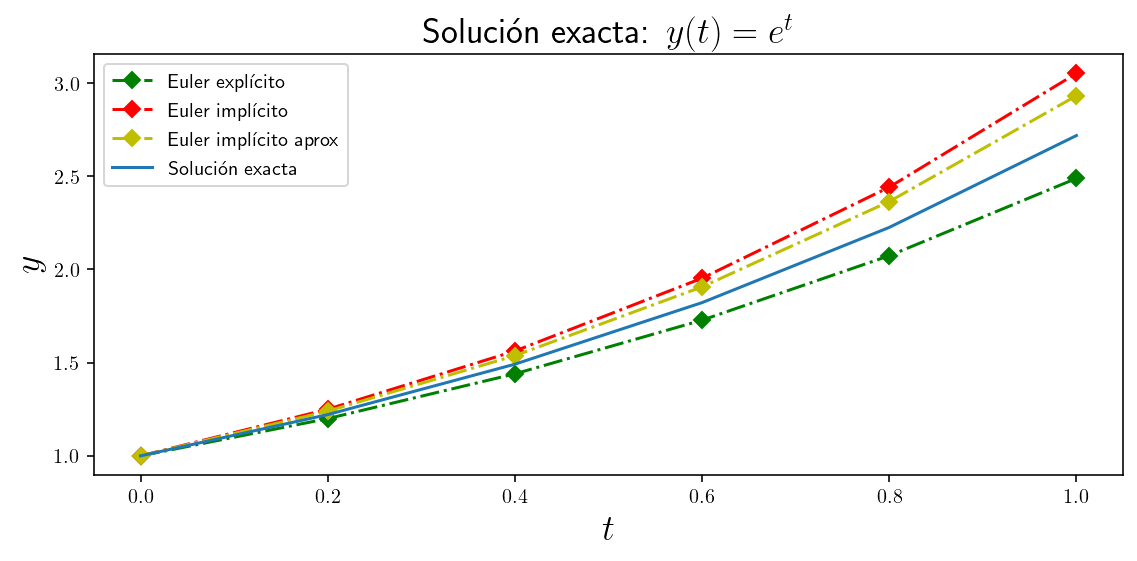

In [120]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx_exp,exp, 'g-.D',label = "Euler explícito")
ax.plot(xx_imp,imp, 'r-.D',label = "Euler implícito")
ax.plot(xx_aprox,aprox, 'y-.D',label = "Euler implícito aprox")
ax.plot(xx_exp,exactos, label="Solución exacta")
ax.set_title(r"Solución exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_euler = fig

$N=20$

In [122]:
N = 20

Tiempos de computación:

In [103]:
%%timeit
xx_exp,exp = euler_exp(f,a,ya,b,N)

51.1 µs ± 251 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [104]:
%%timeit
xx_imp,imp = euler_imp(f,a,ya,b,N)

483 ms ± 5.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [105]:
%%timeit
xx_aprox,aprox = euler_imp_aprox(f,a,ya,b,N)

58.8 µs ± 266 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Precisión:

In [123]:
xx_exp,exp = euler_exp(f,a,ya,b,N)
xx_imp,imp = euler_imp(f,a,ya,b,N)
xx_aprox,aprox = euler_imp_aprox(f,a,ya,b,N)
exactos = np.array([sol_exacta.subs({t:xx_exp[n]}) for n in range(len(xx_exp))])
print("Error máximo Euler explícito:",abs(exactos-exp).max())
print("Error máximo Euler implícito:",abs(exactos-imp).max())
print("Error máximo Euler implícito aprox:",abs(exactos-aprox).max())

Error máximo Euler explícito: 0.0649841233146238
Error máximo Euler implícito: 0.0712279890571863
Error máximo Euler implícito aprox: 0.0642624896629727


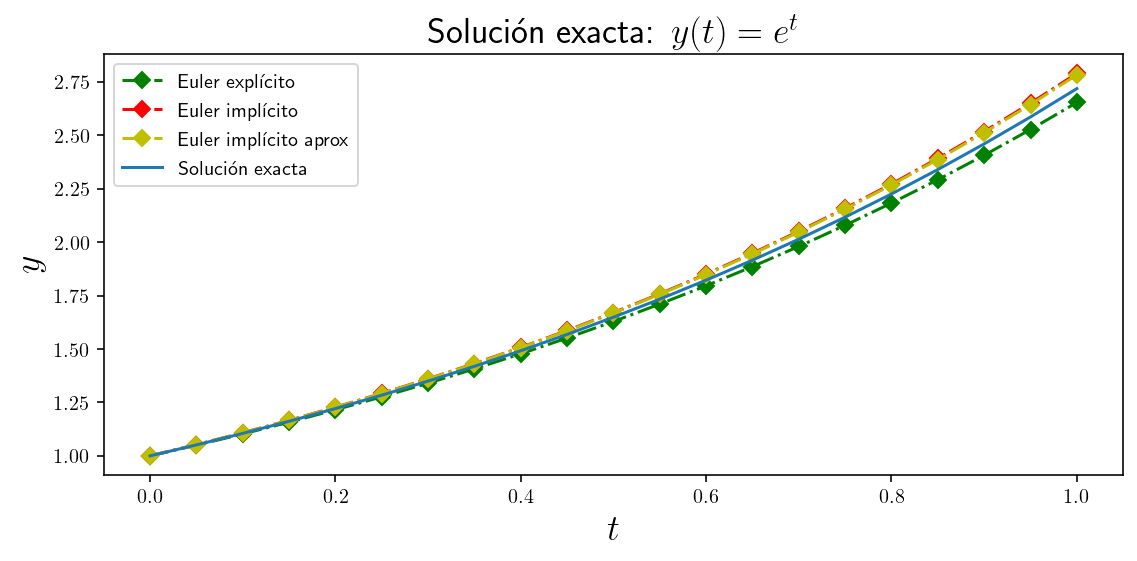

In [124]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx_exp,exp, 'g-.D',label = "Euler explícito")
ax.plot(xx_imp,imp, 'r-.D',label = "Euler implícito")
ax.plot(xx_aprox,aprox, 'y-.D',label = "Euler implícito aprox")
ax.plot(xx_exp,exactos, label="Solución exacta")
ax.set_title(r"Solución exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_euler = fig

$N=50$

In [125]:
N = 50

Tiempos de computación:

In [109]:
%%timeit
xx_exp,exp = euler_exp(f,a,ya,b,N)

61.4 µs ± 3.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [110]:
%%timeit
xx_imp,imp = euler_imp(f,a,ya,b,N)

1.15 s ± 54.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [111]:
%%timeit
xx_aprox,aprox = euler_imp_aprox(f,a,ya,b,N)

76.6 µs ± 700 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Precisión:

In [126]:
xx_exp,exp = euler_exp(f,a,ya,b,N)
xx_imp,imp = euler_imp(f,a,ya,b,N)
xx_aprox,aprox = euler_imp_aprox(f,a,ya,b,N)
exactos = np.array([sol_exacta.subs({t:xx_exp[n]}) for n in range(len(xx_exp))])
print("Error máximo Euler explícito:",abs(exactos-exp).max())
print("Error máximo Euler implícito:",abs(exactos-imp).max())
print("Error máximo Euler implícito aprox:",abs(exactos-aprox).max())

Error máximo Euler explícito: 0.0266937993854399
Error máximo Euler implícito: 0.0276908724005622
Error máximo Euler implícito aprox: 0.0265926985769247


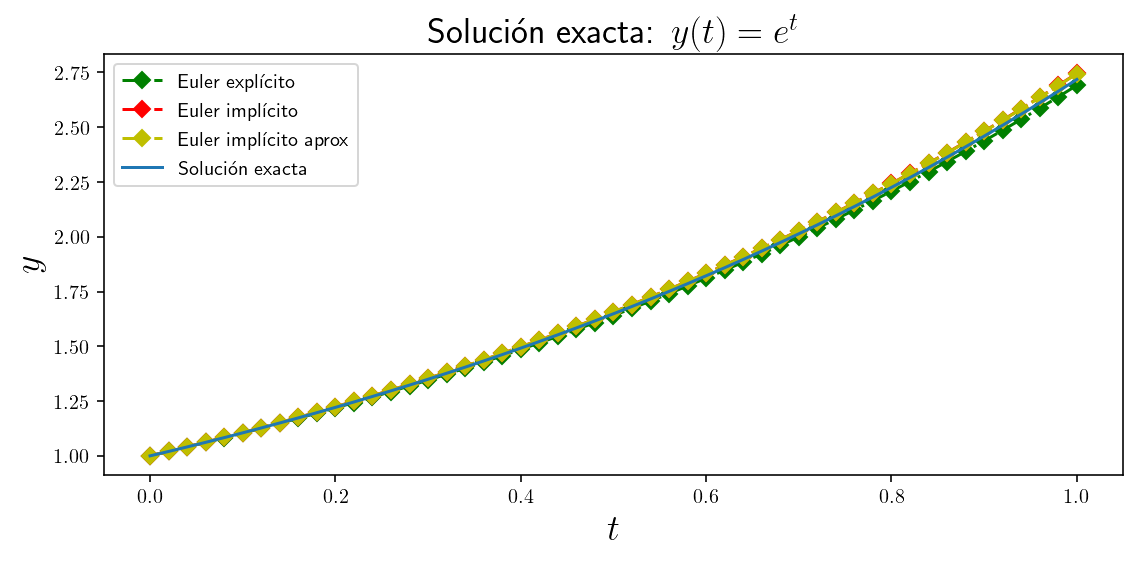

In [127]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx_exp,exp, 'g-.D',label = "Euler explícito")
ax.plot(xx_imp,imp, 'r-.D',label = "Euler implícito")
ax.plot(xx_aprox,aprox, 'y-.D',label = "Euler implícito aprox")
ax.plot(xx_exp,exactos, label="Solución exacta")
ax.set_title(r"Solución exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_euler = fig

Podemos observar que si aumentamos el tamaño de las particiones, aumenta tanto la precisión como el tiempo cómputo, siendo siempre el método implícito el que da peoes resultados. Todos los métodos son estables por ser de un paso

## Ejercicio 2 Euler

A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

In [146]:
# Euler mejorado
def euler_medio(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n]+(h/2),Y[n]+((h/2)*F(X[n],Y[n]))))
    return np.array(X),np.array(Y)
# Euler modificado
def heun(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + (h/2)*(F(X[n],Y[n])+F(X[n+1],Y[n]+((h/2)*F(X[n],Y[n])))))
    return np.array(X),np.array(Y)

In [148]:
N = 10
xx_exp,exp = euler_exp(f,a,ya,b,N)
xx_med,med = euler_medio(f,a,ya,b,N)
xx_heun,_heun = heun(f,a,ya,b,N)
exactos = np.array([sol_exacta.subs({t:xx_exp[n]}) for n in range(len(xx_exp))])
print("Error máximo Euler explícito:",abs(exactos-exp).max())
print("Error máximo Euler mejorado:",abs(exactos-med).max())
print("Error máximo Euler modificado:",abs(exactos-_heun).max())

Error máximo Euler explícito: 0.124539368359045
Error máximo Euler mejorado: 0.00420098185082107
Error máximo Euler modificado: 0.0649841233146247


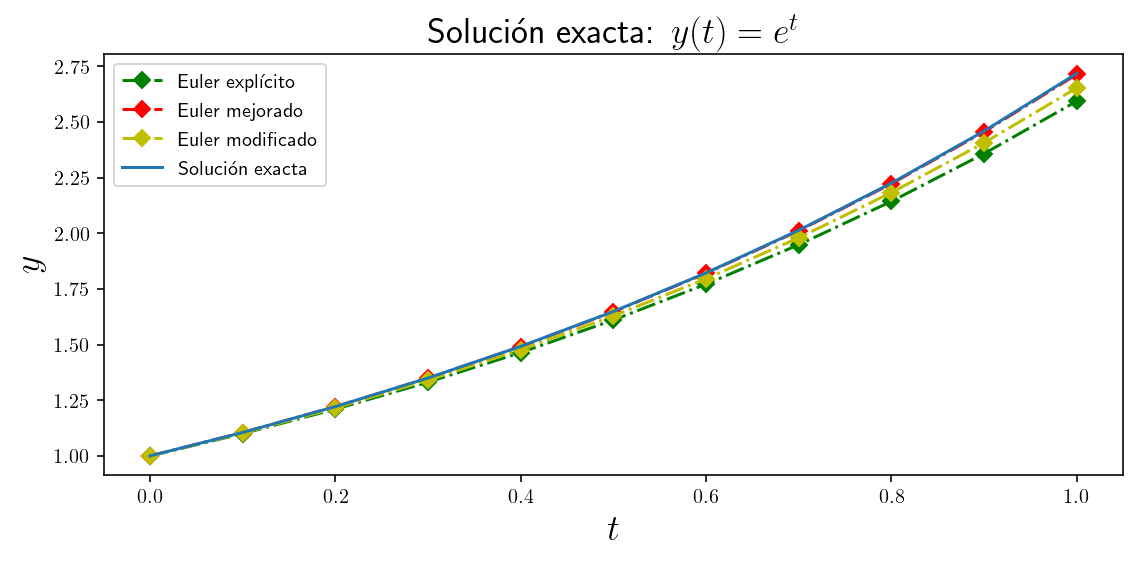

In [149]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx_exp,exp, 'g-.D',label = "Euler explícito")
ax.plot(xx_med,med, 'r-.D',label = "Euler mejorado")
ax.plot(xx_heun,_heun, 'y-.D',label = "Euler modificado")
ax.plot(xx_exp,exactos, label="Solución exacta")
ax.set_title(r"Solución exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_euler_mods = fig

## Ejercicio 1 Taylor

Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.

In [217]:
def taylor_2(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

In [218]:
xx_5,t5 = taylor_2(f,a,ya,b,5)
xx_20,t20 = taylor_2(f,a,ya,b,20)
xx_50,t50 = taylor_2(f,a,ya,b,50)
exactos5 = np.array([sol_exacta.subs({t:xx_5[n]}) for n in range(len(xx_5))])
exactos20 = np.array([sol_exacta.subs({t:xx_20[n]}) for n in range(len(xx_20))])
exactos50 = np.array([sol_exacta.subs({t:xx_50[n]}) for n in range(len(xx_50))])
print("Error máximo Taylor N=5:",abs(exactos5-t5).max())
print("Error máximo Taylor N=20:",abs(exactos20-t20).max())
print("Error máximo Taylor N=50:",abs(exactos50-t50).max())

Error máximo Taylor N=5: 0.0155736652590450
Error máximo Taylor N=20: 0.00109077410416036
Error máximo Taylor N=50: 0.000178516387869365


Órdenes de convergencia (N=10):

In [246]:
def orden_convergencia(error,h):
    cumple = True
    orden = 1
    
    while cumple:
        for r in error:
            if abs(r)<h**(orden+1):
                cumple = True
            else:
                cumple = False
                break
        if cumple:
            orden += 1
    
    return orden

In [247]:
N = 10
h = (b-a)/N
xx_exp,exp = euler_exp(f,a,ya,b,N)
xx_imp,imp = euler_imp(f,a,ya,b,N)
xx_aprox,aprox = euler_imp_aprox(f,a,ya,b,N)
xx_med,med = euler_medio(f,a,ya,b,N)
xx_heun,_heun = heun(f,a,ya,b,N)
xx_t,taylor = taylor_2(f,a,ya,b,N)
exactos = np.array([sol_exacta.subs({t:xx_exp[n]}) for n in range(len(xx_exp))])

In [248]:
error_euler1 = exactos - exp
error_euler2 = exactos - imp
error_euler3 = exactos - aprox
error_euler4 = exactos - med
error_euler5 = exactos - _heun
error_taylor = exactos - taylor
print("Orden de convergencia Euler explícito:",orden_convergencia(error_euler1,h))
print("Orden de convergencia Euler implícito:",orden_convergencia(error_euler2,h))
print("Orden de convergencia Euler implícito aprox:",orden_convergencia(error_euler3,h))
print("Orden de convergencia Euler mejorado (Punto medio):",orden_convergencia(error_euler4,h))
print("Orden de convergencia Euler modificado (Heun):",orden_convergencia(error_euler5,h))
print("Orden de convergencia Taylor orden p=2:",orden_convergencia(error_taylor,h))

Orden de convergencia Euler explícito: 1
Orden de convergencia Euler implícito: 1
Orden de convergencia Euler implícito aprox: 1
Orden de convergencia Euler mejorado (Punto medio): 2
Orden de convergencia Euler modificado (Heun): 1
Orden de convergencia Taylor orden p=2: 2


Podemos observar que se ratifican los órdenes, salvo  de el de Euler modificado. Además, el método de Taylor  es mucho más preciso que el de Euler.

## Ejercicio 2 Taylor

A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

In [222]:
def taylor_3(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F1(t,z),t) + sp.diff(F1(t,z),z)*F1(t,z)
    
    def F3(t,z):
        return sp.diff(F2(t,z),t)+sp.diff(F1(t,z),z)*F2(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]})+h**3/6*F3(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

In [225]:
xx_20,t20 = taylor_3(f,a,ya,b,20)
xx_t,taylor = taylor_2(f,a,ya,b,20)
exactos20 = np.array([sol_exacta.subs({t:xx_20[n]}) for n in range(len(xx_20))])
print("Error máximo Taylor orden 3:",abs(exactos20-t20).max())
print("Error máximo Taylor orden 2:",abs(exactos20-taylor).max())

Error máximo Taylor orden 3: 1.36030081892002e-5
Error máximo Taylor orden 2: 0.00109077410416036


## Ejercicio 1 Runge-Kutta

Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional 

In [191]:
def rk4(F,x0,y0,xfinal,N):
    
    def RK4(F,xn,yn,h):
        K1 = F(xn,yn)
        K2 = F(xn + h/2, yn + K1*h/2)
        K3 = F(xn + h/2, yn + K2*h/2)
        K4 = F(xn + h  , yn + K3*h)
        return (K1 + 2*K2 + 2*K3 + K4)/6    
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append( Y[n] + h*RK4(F,X[n],Y[n],h) )
    return np.array(X),np.array(Y)

$N=5$

In [258]:
N = 5

In [259]:
%%timeit
xx_5,rk5 = rk4(f,a,ya,b,N)

51 µs ± 2.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [260]:
xx_5,rk5 = rk4(f,a,ya,b,N)
exactos_5 = np.array([sol_exacta.subs({t:xx_5[n]}) for n in range(len(xx_5))])

$N=20$

In [261]:
N = 20

In [262]:
%%timeit
xx_20,rk20 = rk4(f,a,ya,b,N)

80.9 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [263]:
xx_20,rk20 = rk4(f,a,ya,b,N)
exactos_20 = np.array([sol_exacta.subs({t:xx_20[n]}) for n in range(len(xx_20))])

$N=50$

In [264]:
N = 50

In [265]:
%%timeit
xx_50,rk50 = rk4(f,a,ya,b,N)

142 µs ± 2.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [266]:
xx_50,rk50 = rk4(f,a,ya,b,N)
exactos_50 = np.array([sol_exacta.subs({t:xx_50[n]}) for n in range(len(xx_50))])

In [267]:
print("Error máximo N=5:",abs(exactos5-rk5).max())
print("Error máximo N=20:",abs(exactos20-rk20).max())
print("Error máximo N=50:",abs(exactos50-rk50).max())

Error máximo N=5: 3.06918531096656e-5
Error máximo N=20: 1.35802709966271e-7
Error máximo N=50: 3.56448515148600e-9


Podemos observar, como anteriormente, que aumentando la $N$ aumenta tanto la precisión como el coste computacional. Como es convergente, es estable

## Ejercicio 2 Runge-Kutta

A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher.

In [293]:
# Runge-Kutta explícito para m evaluaciones
def rk(F,x0,y0,xfinal,N,butcher):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    h = (xfinal-x0)/N
    c_i = butcher[0]
    b_i = butcher[2]
    a_ij = butcher[1]
    m = len(c_i)
    
    def rk_butcher(a,b,c,h,t,x,F,m):
        Ki = [F(t,x)]
        for i in range(1,m):
            Ki.append(F(t+c[i]*h,x+h*sum([a[i][j]*Ki[j] for j in range(i)])))
        return sum([b[i]*Ki[i] for i in range(m)])
        
    for n in range(N):
        Y.append(Y[n]+h*rk_butcher(a_ij,b_i,c_i,h,X[n],Y[n],F,m))
    return np.array(X),np.array(Y)

Para ejemplificar, usaré el siguiente arreglo:
$$\begin{array}{c | c c}
    0 & 0 & 0 \\
    \frac 23 & \frac23 & 0 \\
    \hline
    & \frac 14 & \frac 34
\end{array}$$

In [294]:
butcher = [[0,2/3],[[0,0],[2/3,0]],[1/4,3/4]]
N = 10
xx_rk,rk_exp = rk(f,a,ya,b,N,butcher)
exactos = np.array([sol_exacta.subs({t:xx_rk[n]}) for n in range(len(xx_rk))])
print("Error máximo:",abs(exactos-rk_exp).max())

Error máximo: 0.00420098185082107
